# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Depaoli

Student name: Lucia
     
ID: 2016960

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2016960
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 55 70 58 52 52 63 79 54 58]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


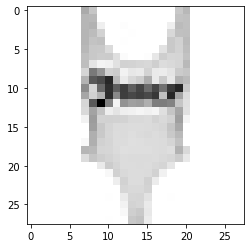

LABEL: 0
INPUT:


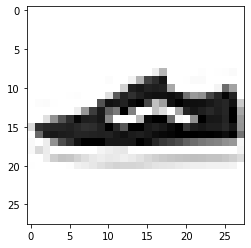

LABEL: 7
INPUT:


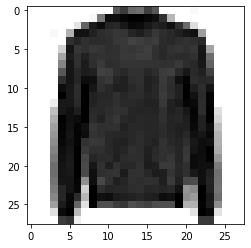

LABEL: 4
INPUT:


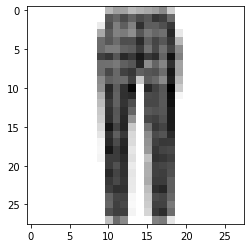

LABEL: 1


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

import pandas as pd

# parameters for linear SVM
parameters = {'kernel' : ['linear'] , 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
  
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=4, return_train_score=True)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
df=pd.DataFrame(clf.cv_results_)
df[['params', 'mean_test_score']]

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.1, 'kernel': 'linear'}
Score with best parameters:
0.785
All scores on the grid:


,params,mean_test_score
0,"{'C': 0.001, 'kernel': 'linear'}",0.613333
1,"{'C': 0.01, 'kernel': 'linear'}",0.765000
2,"{'C': 0.1, 'kernel': 'linear'}",0.785000
3,"{'C': 1, 'kernel': 'linear'}",0.783333
4,"{'C': 10, 'kernel': 'linear'}",0.783333
5,"{'C': 100, 'kernel': 'linear'}",0.783333


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

svc = SVC()
clf = GridSearchCV(SVC(kernel='poly', degree=2), parameters, cv=4, return_train_score=True)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
df=pd.DataFrame(clf.cv_results_)
df[['params', 'mean_test_score']]

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.5}
Score with best parameters:
0.7716666666666666

All scores on the grid:


,params,mean_test_score
0,"{'C': 0.05, 'gamma': 0.05}",0.756667
1,"{'C': 0.05, 'gamma': 0.5}",0.771667
2,"{'C': 0.05, 'gamma': 5.0}",0.771667
3,"{'C': 0.5, 'gamma': 0.05}",0.765000
4,"{'C': 0.5, 'gamma': 0.5}",0.771667
5,"{'C': 0.5, 'gamma': 5.0}",0.771667
6,"{'C': 5, 'gamma': 0.05}",0.771667
7,"{'C': 5, 'gamma': 0.5}",0.771667
8,"{'C': 5, 'gamma': 5.0}",0.771667


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [11]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4

svc = SVC()
clf = GridSearchCV(SVC(kernel='poly', degree=degree), parameters, cv=4, return_train_score=True)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
df=pd.DataFrame(clf.cv_results_)
df[['params', 'mean_test_score']]

RESULTS FOR POLY DEGREE= 4  KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.5}
Score with best parameters:
0.7316666666666667

All scores on the grid:


,params,mean_test_score
0,"{'C': 0.05, 'gamma': 0.05}",0.728333
1,"{'C': 0.05, 'gamma': 0.5}",0.731667
2,"{'C': 0.05, 'gamma': 5.0}",0.731667
3,"{'C': 0.5, 'gamma': 0.05}",0.730000
4,"{'C': 0.5, 'gamma': 0.5}",0.731667
5,"{'C': 0.5, 'gamma': 5.0}",0.731667
6,"{'C': 5, 'gamma': 0.05}",0.731667
7,"{'C': 5, 'gamma': 0.5}",0.731667
8,"{'C': 5, 'gamma': 5.0}",0.731667


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [12]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

svc = SVC()
clf = GridSearchCV(SVC(kernel='rbf'), parameters, cv=4, return_train_score=True)
clf.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
df=pd.DataFrame(clf.cv_results_)
df[['params', 'mean_test_score']]

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 50, 'gamma': 0.005}
Score with best parameters:
0.8

All scores on the grid:


,params,mean_test_score
0,"{'C': 0.5, 'gamma': 0.005}",0.721667
1,"{'C': 0.5, 'gamma': 0.05}",0.675000
2,"{'C': 0.5, 'gamma': 0.5}",0.131667
3,"{'C': 0.5, 'gamma': 5}",0.131667
4,"{'C': 5, 'gamma': 0.005}",0.781667
5,"{'C': 5, 'gamma': 0.05}",0.748333
6,"{'C': 5, 'gamma': 0.5}",0.135000
7,"{'C': 5, 'gamma': 5}",0.131667
8,"{'C': 50, 'gamma': 0.005}",0.800000
9,"{'C': 50, 'gamma': 0.05}",0.748333


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

The best score is achieved using RBF kernels. The second one with the best score is the linear kernel.
The problem is that all the scores achieved with linear and poly kernels are approximately the same (around 0.7), while with RBF we have from 0.1 to 0.8 scores depends on gamma and C chosen.
So when we run RBF kernels, it is useful to try the computation with a lot of different value of C and Gamma.

## TO DO 5
Report here the best SVM kernel and parameters

In [13]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(kernel='rbf', C=50, gamma=0.005)
best_SVM.fit(X_train,y_train)

training_error=1-best_SVM.score(X_train,y_train)
test_error=1-best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.205500


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [14]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],test_error))
    
    plt.show()

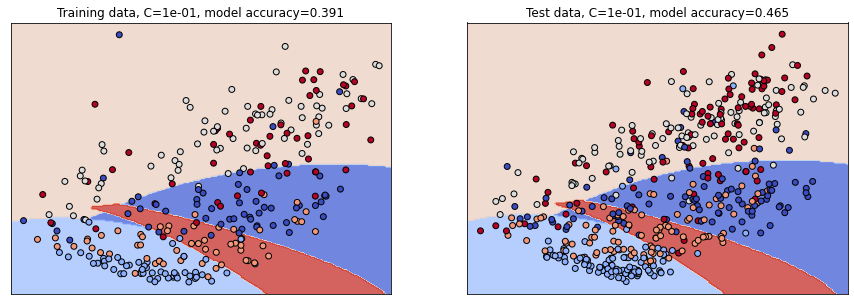

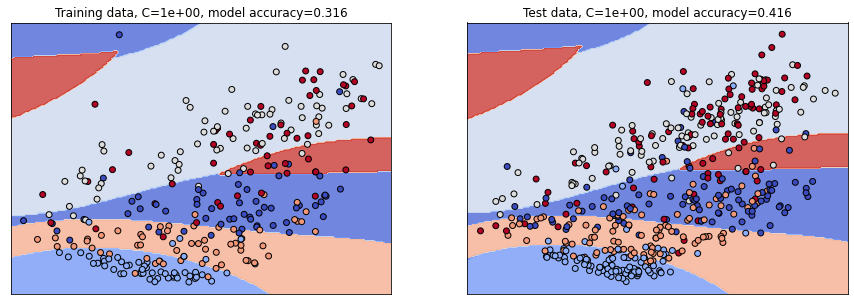

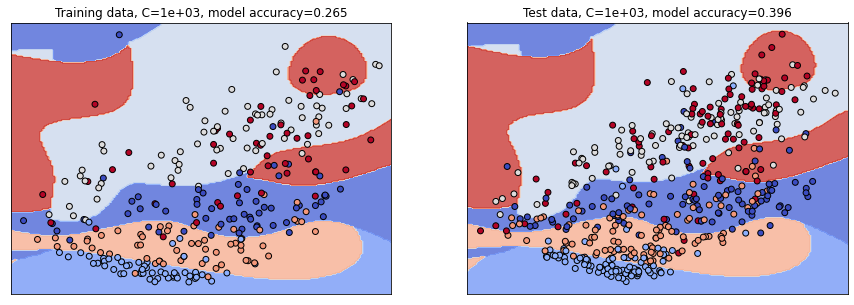

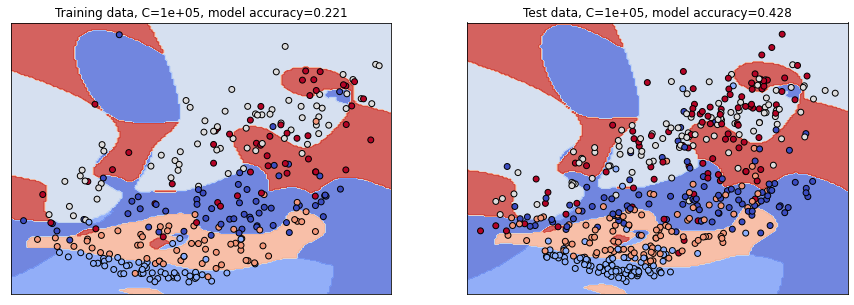

In [15]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    my_svm = SVC(kernel='rbf', C=C, gamma= 0.5)
    
    my_svm.fit(X_train_pca,y_train_plot)
    train_error=1-my_svm.score(X_train_pca,y_train_plot)
    test_error=1-my_svm.score(X_test_pca,y_test_plot)
    
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

For bigger C we have more boundaries, so we have the risk of overfitting and probably we can't understand too much from the study of the data.
With less C, however, we have more misclassified samples.
In our case, looking at the model accuracy, the best C is the smallest one. This is not always true! It depends on the dataset.

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [16]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


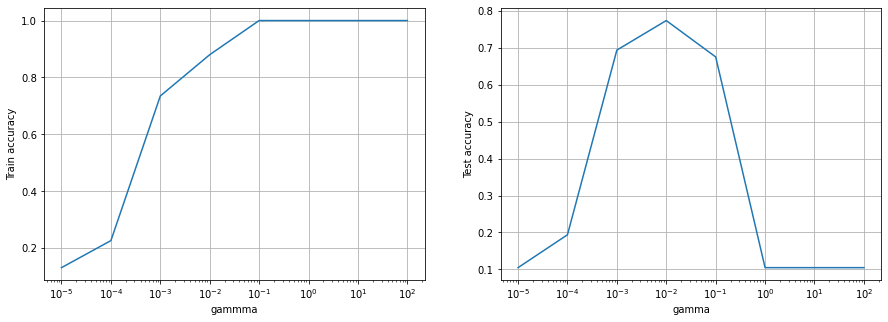

In [17]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

for gamma in gamma_values:
    my_svm1 = SVC(kernel='rbf', C=1, gamma=gamma)
    my_svm1.fit(X_train,y_train)
    
    train_error=1-my_svm1.score(X_train,y_train)
    train_acc_list.append(1-train_error)
    
    test_error=1-my_svm1.score(X_test,y_test)
    test_acc_list.append(1-test_error)

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gammma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

Training error goes from big values to smaller ones at the increasing of gamma. So for training error, best gammas are the biggest one.
For the test error, accuracy have the form of a gaussian centered the mean values of gamma. So for the test error, best gammas are the ones in the center.

We have the risk of overfitting for biggest gamma, because gamma controls concepts of "close" and "far". Indeed, we notice that for big gammas, the training accuracy is almost 1 (so perfect score), but for these  values of gammas, the test error is very big (accuracy is around 0.1).

In our case, best gammas are the one in the center (10e-3, 10e-2, 10e-1). After 10e-1, test error drastically increases.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [18]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [130 152 153 142 160 143 160 142 167 151]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [21]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(kernel='rbf', C=50, gamma= 0.005)
best_SVM.fit(X_train,y_train)

training_error=1-best_SVM.score(X_train,y_train)
test_error=1-best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.172051


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [22]:
from sklearn import linear_model

log_reg = linear_model.LogisticRegression(C=50000,max_iter=10000)
log_reg.fit(X_train,y_train)

training_error=1-log_reg.score(X_train,y_train)
test_error=1-log_reg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.219504


## TO DO 10 Try  with regularization (use C=1)¶

In [24]:
log_reg1 = linear_model.LogisticRegression(C=1,max_iter=10000)
log_reg1.fit(X_train,y_train)

training_error=1-log_reg1.score(X_train,y_train)
test_error=1-log_reg1.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.008000
Best regularized logistic regression test error: 0.194120


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

For m=600 and m=1500 we have the same training error (0), but different test error: test error for m=1500 is smaller than the one achieved with m=600.

For the logistic regression, we have zero error on the training set without regularization and 0.008 with regularization, but the test error are slightly bigger than the ones obtained with SVM. With regularization we have smaller test error than without regularization. Notice that we put a max_iter on log_reg for reaching convergence.


## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [25]:
from sklearn.svm import SVC

LR_prediction = log_reg1.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

#print(len(X_test))

INPUT:


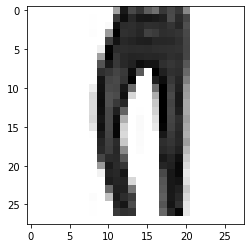

LABEL: 1


In [26]:
misclass=[]

for i in range(len(y_train)):
    if (LR_prediction[i] != y_test[i]) and (SVM_prediction[i] == y_test[i]):
        misclass.append(i)
    
plot_input(X_test,y_test,np.random.choice(misclass, 1))

## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [28]:
np.set_printoptions(precision=2, suppress=True, floatmode='fixed') # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test,SVM_prediction)

print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  skm.confusion_matrix(y_test,LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5870 5848 5847 5858 5840 5857 5840 5858 5833 5849]

 Confusion matrix SVM  
 
 [[4564   12  122  227   12   13  859    0   60    1]
 [  57 5558   56  135    9    0   28    0    5    0]
 [  98    8 4322   48  667    1  672    0   31    0]
 [ 363  100  101 4790  297    0  191    0   16    0]
 [  33    9  750  165 4341    3  512    0   26    1]
 [   4    2    0    3    1 5282    4  346   32  183]
 [ 944    8  757  132  461    3 3455    1   79    0]
 [   0    0    0    1    0  277    0 5210    9  361]
 [  37    8   40   35   24   72  100   23 5490    4]
 [   1    3    0    2    0  167    1  251    1 5423]]

 Confusion matrix SVM (normalized)   
 
 [[0.78 0.00 0.02 0.04 0.00 0.00 0.15 0.00 0.01 0.00]
 [0.01 0.95 0.01 0.02 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.02 0.00 0.74 0.01 0.11 0.00 0.11 0.00 0.01 0.00]
 [0.06 0.02 0.02 0.82 0.05 0.00 0.03 0.00 0.00 0.00]
 [0.01 0.00 0.13 0.03 0.74 0.00 0.09 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.90 0.00 0.06 0.0

In [29]:
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )


 Confusion matrix SVM (normalized)   
 
 [[0.78 0.00 0.02 0.04 0.00 0.00 0.15 0.00 0.01 0.00]
 [0.01 0.95 0.01 0.02 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.02 0.00 0.74 0.01 0.11 0.00 0.11 0.00 0.01 0.00]
 [0.06 0.02 0.02 0.82 0.05 0.00 0.03 0.00 0.00 0.00]
 [0.01 0.00 0.13 0.03 0.74 0.00 0.09 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.90 0.00 0.06 0.01 0.03]
 [0.16 0.00 0.13 0.02 0.08 0.00 0.59 0.00 0.01 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.05 0.00 0.89 0.00 0.06]
 [0.01 0.00 0.01 0.01 0.00 0.01 0.02 0.00 0.94 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.03 0.00 0.04 0.00 0.93]]

 Confusion matrix LR (normalized)   
 
 [[0.76 0.00 0.02 0.04 0.01 0.00 0.14 0.00 0.02 0.00]
 [0.01 0.93 0.01 0.03 0.01 0.00 0.01 0.00 0.00 0.00]
 [0.02 0.00 0.69 0.01 0.13 0.00 0.14 0.00 0.01 0.00]
 [0.05 0.02 0.02 0.81 0.05 0.00 0.05 0.00 0.00 0.00]
 [0.00 0.00 0.11 0.02 0.74 0.00 0.12 0.00 0.01 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.87 0.00 0.08 0.01 0.04]
 [0.15 0.00 0.13 0.03 0.12 0.00 0.55 0.00 0.02 0.00]
 [0.00 0.00 0.0

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

The classes with lower accuracies both in SVM and LR are 0 (t-shirt), 2 (pullover), 3 (dress), 6 (shirt). We can notice that there clothes are very similiar to each other respect to the other clothes in the database (like shoes or bag, for example). The misclassified samples are pretty normal because our images have very low resolution, so our learner can make a makes a mistake and classifies a shirt as a t-shirt or viceversa.